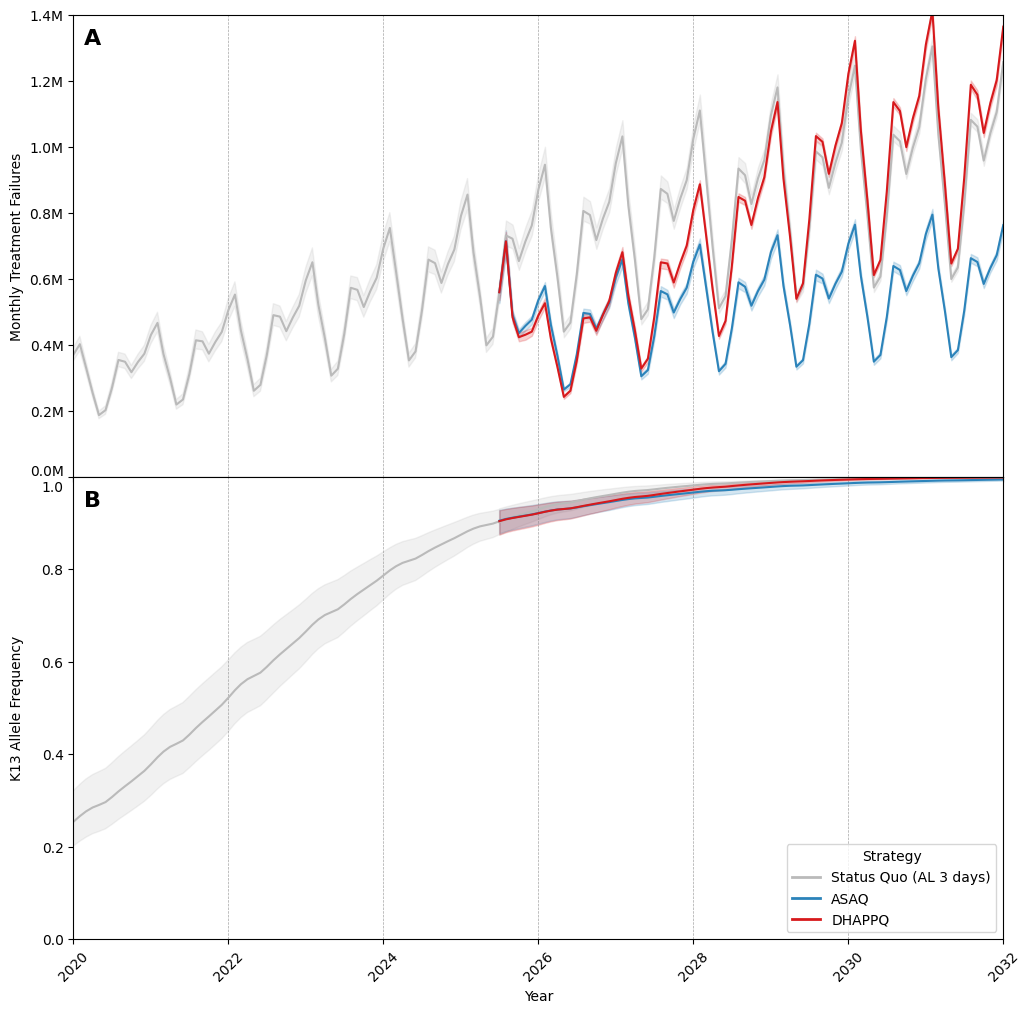

<Figure size 640x480 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import pandas as pd
from matplotlib.lines import Line2D

filtered_combined_data = pd.read_csv("./data/fig4_data.csv")


# Adjust the y-axis to show values in millions
def millions_formatter(x, pos):
    return f'{x * 1e-6:.1f}M'  # Formats in millions with one decimal point

# Define the color palette for the two periods and strategies
palette_after = {'asaq': '#2b83ba', 'dhappq': '#d7191c', 'status_quo': '#bababa'}
cold_color = '#bababa'  # Color for 'Before Sep 2024'

# Define the year locator for x-axis
locator = mdates.YearLocator(2)

# Load the data
# monthly_data = pd.read_csv('../raw_data/monthly_data_parallel.csv')
# filtered_combined_data = monthly_data[monthly_data["scenario"].isin(["status_quo", "asaq", "dhappq"])]
filtered_combined_data.loc[:, 'date'] = pd.to_datetime(filtered_combined_data['date'])
critical_point = pd.to_datetime("2025-07-01")

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# Plot 1: Monthly Treatment Failures
sns.lineplot(
    ax=ax1, x="date", y="total_treatmentfailures",
    data=filtered_combined_data[filtered_combined_data["date"] <= critical_point],
    color=cold_color, legend=False, errorbar=("pi", 90) 
)

sns.lineplot(
    ax=ax1, x="date", y="total_treatmentfailures", hue="scenario",
    data=filtered_combined_data[filtered_combined_data["date"] >= critical_point],
    palette=palette_after, errorbar=("pi", 90),
)

ax1.set_xlim(pd.to_datetime("2020-01-01"), pd.to_datetime("2032-01-01"))
ax1.set_ylim([0, 1.4e6])
ax1.set_xlabel('Year')
ax1.set_ylabel('Monthly Treatment Failures')
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(millions_formatter))
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, which='both', axis='x', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
ax1.text(0.03, 0.97, 'A', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')
# ax1.legend(title="Strategy", loc="upper left")
ax1.legend().remove()
yticks = ax1.get_yticks()
yticks = yticks[1:]  # Remove the first label
ax1.set_yticks(yticks)

# Plot 2: K13 Allele Frequency
sns.lineplot(
    ax=ax2, x="date", y="k13_frequency",
    data=filtered_combined_data[filtered_combined_data["date"] <= critical_point],
    color=cold_color, legend=False, errorbar=("pi", 90)
)
sns.lineplot(
    ax=ax2, x="date", y="k13_frequency", hue="scenario",
    data=filtered_combined_data[filtered_combined_data["date"] >= critical_point],
    palette=palette_after, errorbar=("pi", 90)
)

ax2.set_xlim(pd.to_datetime("2020-01-01"), pd.to_datetime("2032-01-01"))
ax2.set_ylim([0, 1])
ax2.set_xlabel('Year')
ax2.set_ylabel('K13 Allele Frequency')
ax2.xaxis.set_major_locator(locator)
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, which='both', axis='x', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
ax2.text(0.03, 0.97, 'B', transform=ax2.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')
# ax2.legend(title="Strategy", loc="upper left")
# Get the current y-ticks
yticks = ax2.get_yticks()

# Get current labels and modify the last one
yticks_labels = [item.get_text() for item in ax2.get_yticklabels()]
if yticks_labels:  # Ensure there are labels to modify
    yticks_labels[-1] = '0.0M\n1.0'

# Set fixed tick positions and modified labels
ax2.set_yticks(yticks)  # Ensure tick positions remain consistent
ax2.set_yticklabels(yticks_labels)



# -------------------------------
# Create a custom legend using scenario_mapping
# -------------------------------
scenario_mapping = {
  "status_quo": {"label": "Status Quo (AL 3 days)", "color": "#bababa", "position": 0},
    "asaq" : {"label": "ASAQ", "color": "#2b83ba", "position": 0},
    "dhappq" : {"label": "DHAPPQ", "color": "#d7191c", "position": 0},
}

# Build custom legend handles and labels.
# (Optionally, you might filter these based on which scenarios appear in your data.)
custom_handles = []
custom_labels = []
for key, mapping in scenario_mapping.items():
    custom_handles.append(Line2D([0], [0], color=mapping["color"], lw=2))
    custom_labels.append(mapping["label"])

# Add the custom legend to one of your axes (here, we add it to ax1)
ax2.legend(handles=custom_handles, labels=custom_labels, title="Strategy", loc="lower right")

# Adjust layout to remove gaps between subplots
plt.subplots_adjust(hspace=0)
plt.show()
plt.savefig("fig4.png", dpi=300, bbox_inches='tight')

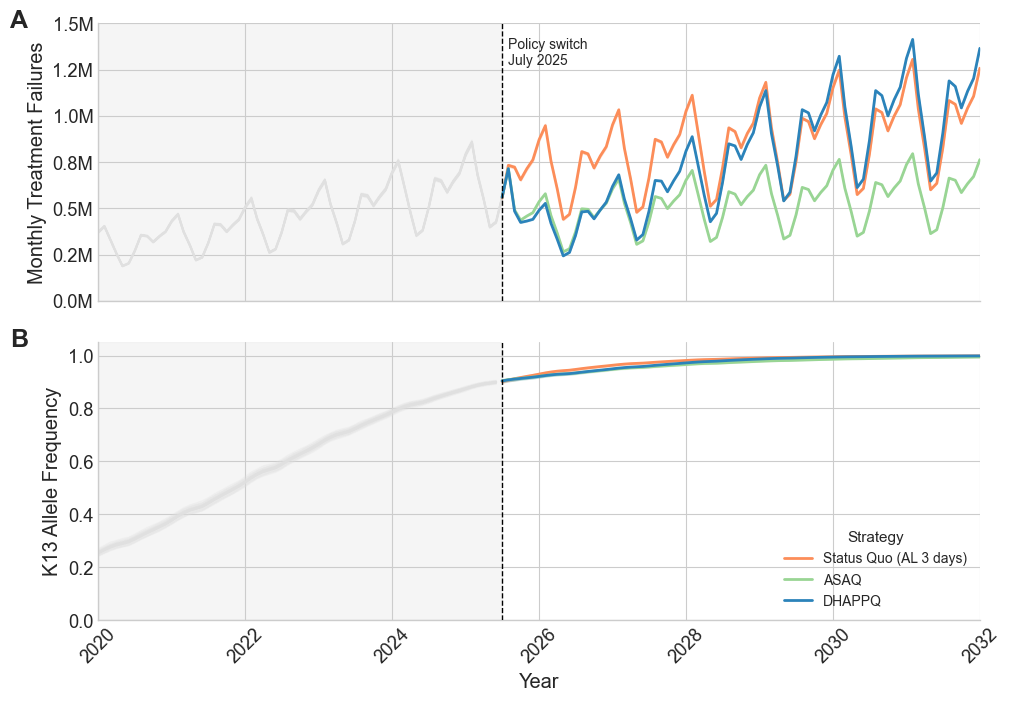

Plot saved as fig4_malaria_policy_scenarios.pdf and fig4_malaria_policy_scenarios.png
Plot generation complete.


<Figure size 640x480 with 0 Axes>

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
import pandas as pd
import os

# --- Configuration & Data Loading ---

# Define the path to the data file.
# Assumes 'fig4_data.csv' is in the same directory as this script.
csv_path = "./data/fig4_data.csv"

# Attempt to load the dataset
try:
    df = pd.read_csv(csv_path)
except FileNotFoundError:
    print(f"Error: Data file not found at path: {csv_path}.")
    print("Please ensure 'fig4_data.csv' is in the same directory as the script.")
    raise

# Convert the 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

# Filter scenarios
scenarios_to_plot = ["status_quo", "asaq", "dhappq"]
filtered_data = df[df['scenario'].isin(scenarios_to_plot)]
critical_point = pd.to_datetime("2025-07-01")

# --- Plotting Setup ---

# Define colors
colors = {
    "status_quo": "#fc8d59",
    "asaq": "#99d594",
    "dhappq": "#2b83ba",
}
pre_policy_color = "#e0e0e0"

# Matplotlib date conversion for rectangle
x_start_num = mdates.date2num(filtered_data['date'].min())
x_end_num = mdates.date2num(critical_point)
rectangle_width = x_end_num - x_start_num

# Optional: Set global font for consistency (check Nature guidelines)
# plt.rcParams['font.family'] = 'sans-serif'
# plt.rcParams['font.sans-serif'] = 'Arial' # Or 'Helvetica', etc.
# plt.rcParams['svg.fonttype'] = 'none' # Ensures text is editable in SVG

# Setup plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7), sharex=True) # Adjusted figsize for typical pub layout
sns.set_context("paper", font_scale=1.5) # Slightly adjusted font_scale
sns.set_style("whitegrid")

# --- Custom Formatter for Y-axis ---
def millions_formatter(x, pos):
    return f'{x * 1e-6:.1f}M'

# --- X-axis Date Formatting ---
x_axis_locator = mdates.YearLocator(2)
x_axis_date_format = mdates.DateFormatter('%Y')

# --- Panel A: Monthly Treatment Failures ---
for scenario_name in colors:
    pre_policy_df = filtered_data[(filtered_data["scenario"] == scenario_name) & (filtered_data["date"] <= critical_point)]
    sns.lineplot(data=pre_policy_df, x='date', y='total_treatmentfailures', ax=ax1,
                 color=pre_policy_color, lw=1.5, alpha=0.8, zorder=1)
    post_policy_df = filtered_data[(filtered_data["scenario"] == scenario_name) & (filtered_data["date"] >= critical_point)]
    sns.lineplot(data=post_policy_df, x='date', y='total_treatmentfailures', ax=ax1,
                 color=colors[scenario_name], lw=2, zorder=2)

ax1.add_patch(Rectangle((x_start_num, 0), rectangle_width, 1.5e6, transform=ax1.transData,
                        color=pre_policy_color, alpha=0.3, zorder=0))
ax1.set_ylabel("Monthly Treatment Failures")
ax1.set_ylim([0, 1.5e6])
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(millions_formatter))
ax1.set_xlim([pd.to_datetime("2020-01-01"), pd.to_datetime("2032-01-01")])
# ax1.xaxis.set_major_locator(x_axis_locator) # Applied via sharex from ax2
# ax1.xaxis.set_major_formatter(x_axis_date_format) # Applied via sharex from ax2
ax1.tick_params(axis='x', rotation=45)
ax1.tick_params(axis='both', direction='in') # Ticks inside
ax1.text(-0.1, 1.05, "A", transform=ax1.transAxes, fontsize=18, fontweight='bold', va='top') # Adjusted position slightly

# --- Panel B: K13 Allele Frequency ---
for scenario_name in colors:
    pre_policy_df = filtered_data[(filtered_data["scenario"] == scenario_name) & (filtered_data["date"] < critical_point)]
    sns.lineplot(data=pre_policy_df, x='date', y='k13_frequency', ax=ax2,
                 color=pre_policy_color, lw=1.5, alpha=0.8, zorder=1)
    post_policy_df = filtered_data[(filtered_data["scenario"] == scenario_name) & (filtered_data["date"] >= critical_point)]
    sns.lineplot(data=post_policy_df, x='date', y='k13_frequency', ax=ax2,
                 color=colors[scenario_name], lw=2, zorder=2)

ax2.add_patch(Rectangle((x_start_num, 0), rectangle_width, 1.05, transform=ax2.transData,
                        color=pre_policy_color, alpha=0.3, zorder=0))
ax2.set_ylabel("K13 Allele Frequency")
ax2.set_ylim([0, 1.05])
ax2.set_xlabel("Year")
ax2.xaxis.set_major_locator(x_axis_locator)
ax2.xaxis.set_major_formatter(x_axis_date_format)
ax2.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='both', direction='in') # Ticks inside
ax2.text(-0.1, 1.05, "B", transform=ax2.transAxes, fontsize=18, fontweight='bold', va='top') # Adjusted position slightly

# --- Common Plot Elements ---
for ax_current in [ax1, ax2]:
    ax_current.axvline(critical_point, color='black', linestyle='--', lw=1, zorder=3)

ax1.text(critical_point + pd.Timedelta(days=30), ax1.get_ylim()[1] * 0.95, # Slight offset for policy text
         "Policy switch\nJuly 2025", ha='left',
         va='top', fontsize=10, backgroundcolor='none') # Smaller font for annotation, no background if not needed

# --- Custom Legend ---
legend_labels = {
    "status_quo": "Status Quo (AL 3 days)",
    "asaq": "ASAQ",
    "dhappq": "DHAPPQ"
}
custom_legend_lines = [Line2D([0], [0], color=colors[key], lw=2) for key in legend_labels]
ax2.legend(custom_legend_lines, [legend_labels[key] for key in legend_labels],
           title="Strategy", loc='lower right', frameon=False, fontsize=10, title_fontsize=11)

# --- Final Adjustments & Display/Save ---
sns.despine()
plt.tight_layout(pad=0.5) # Add a little padding
plt.subplots_adjust(hspace=0.15)

# Display the plot (optional, can be commented out if only saving)
plt.show()

# Save the figure for publication
# Common formats: .pdf, .png, .tiff, .eps
# Use a high DPI for raster formats like PNG. PDF/EPS are vector formats.
output_filename = "fig4_dual_panels"
try:
    plt.savefig(f"{output_filename}.pdf", bbox_inches='tight')
    plt.savefig(f"{output_filename}.png", dpi=300, bbox_inches='tight')
    print(f"Plot saved as {output_filename}.pdf and {output_filename}.png")
except Exception as e:
    print(f"Error saving plot: {e}")

print("Plot generation complete.")


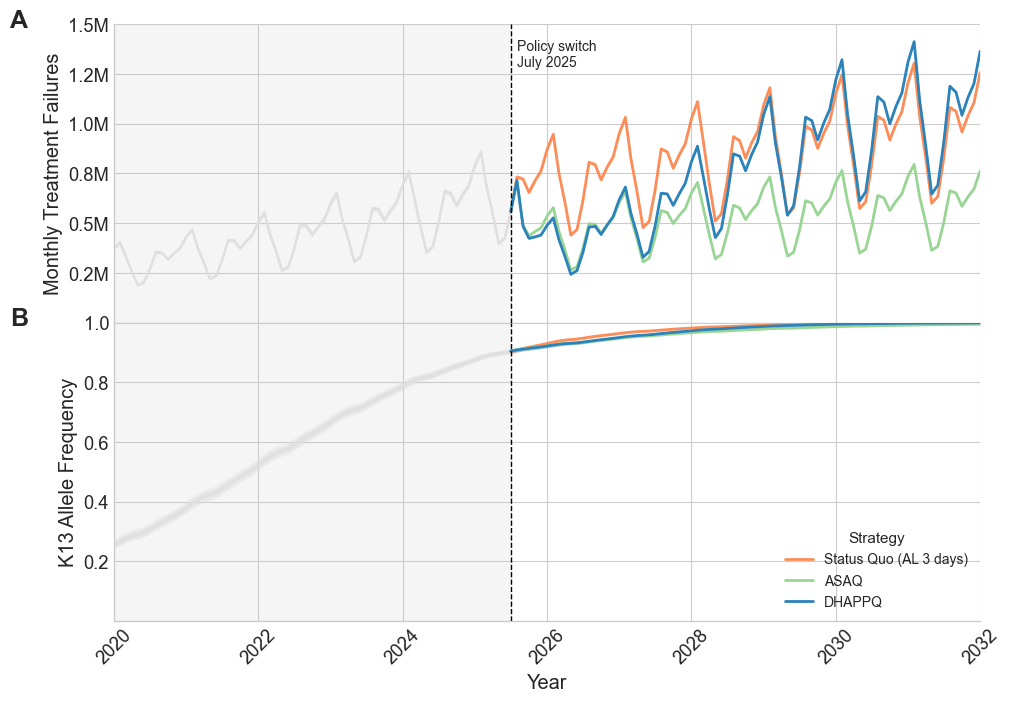

Plot saved as fig4_malaria_policy_scenarios_ylimB.pdf and fig4_malaria_policy_scenarios_ylimB.png
Plot generation complete.


<Figure size 640x480 with 0 Axes>

In [15]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
import pandas as pd
import os

# --- Configuration & Data Loading ---

# Define the path to the data file.
# Assumes 'fig4_data.csv' is in the same directory as this script.
csv_path = "./data/fig4_data.csv"

# Attempt to load the dataset
try:
    df = pd.read_csv(csv_path)
except FileNotFoundError:
    print(f"Error: Data file not found at path: {csv_path}.")
    print("Please ensure 'fig4_data.csv' is in the same directory as the script.")
    raise

# Convert the 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

# Filter scenarios
scenarios_to_plot = ["status_quo", "asaq", "dhappq"]
filtered_data = df[df['scenario'].isin(scenarios_to_plot)]
critical_point = pd.to_datetime("2025-07-01")

# --- Plotting Setup ---

# Define colors
colors = {
    "status_quo": "#fc8d59",
    "asaq": "#99d594",
    "dhappq": "#2b83ba",
}
pre_policy_color = "#e0e0e0"

# Matplotlib date conversion for rectangle
x_start_num = mdates.date2num(filtered_data['date'].min())
x_end_num = mdates.date2num(critical_point)
rectangle_width = x_end_num - x_start_num

# Optional: Set global font for consistency (check Nature guidelines)
# plt.rcParams['font.family'] = 'sans-serif'
# plt.rcParams['font.sans-serif'] = 'Arial' # Or 'Helvetica', etc.
# plt.rcParams['svg.fonttype'] = 'none' # Ensures text is editable in SVG

# Setup plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7), sharex=True)
sns.set_context("paper", font_scale=1.5)
sns.set_style("whitegrid")

# --- Custom Formatter for Y-axis ---
def millions_formatter(x, pos):
    return f'{x * 1e-6:.1f}M'

# --- X-axis Date Formatting ---
x_axis_locator = mdates.YearLocator(2)
x_axis_date_format = mdates.DateFormatter('%Y')

# --- Panel A: Monthly Treatment Failures ---
for scenario_name in colors:
    pre_policy_df = filtered_data[(filtered_data["scenario"] == scenario_name) & (filtered_data["date"] <= critical_point)]
    sns.lineplot(data=pre_policy_df, x='date', y='total_treatmentfailures', ax=ax1,
                 color=pre_policy_color, lw=1.5, alpha=0.8, zorder=1)
    post_policy_df = filtered_data[(filtered_data["scenario"] == scenario_name) & (filtered_data["date"] >= critical_point)]
    sns.lineplot(data=post_policy_df, x='date', y='total_treatmentfailures', ax=ax1,
                 color=colors[scenario_name], lw=2, zorder=2)

ax1.add_patch(Rectangle((x_start_num, 0), rectangle_width, 1.5e6, transform=ax1.transData,
                        color=pre_policy_color, alpha=0.3, zorder=0))
ax1.set_ylabel("Monthly Treatment Failures")
ax1.set_ylim([0, 1.5e6])
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(millions_formatter))
ax1.yaxis.set_major_locator(mticker.MaxNLocator(nbins=6, prune='lower')) # Control number of y-ticks/gridlines

# Hide x-tick labels for the top plot (ax1) as x-axis is shared
plt.setp(ax1.get_xticklabels(), visible=False)
ax1.tick_params(axis='x', bottom=False) # Optionally hide tick marks themselves on ax1
ax1.tick_params(axis='both', direction='in') # Ticks inside
ax1.text(-0.12, 1.05, "A", transform=ax1.transAxes, fontsize=18, fontweight='bold', va='top') # Adjusted x position

# --- Panel B: K13 Allele Frequency ---
for scenario_name in colors:
    pre_policy_df = filtered_data[(filtered_data["scenario"] == scenario_name) & (filtered_data["date"] <= critical_point)]
    sns.lineplot(data=pre_policy_df, x='date', y='k13_frequency', ax=ax2,
                 color=pre_policy_color, lw=1.5, alpha=0.8, zorder=1)
    post_policy_df = filtered_data[(filtered_data["scenario"] == scenario_name) & (filtered_data["date"] >= critical_point)]
    sns.lineplot(data=post_policy_df, x='date', y='k13_frequency', ax=ax2,
                 color=colors[scenario_name], lw=2, zorder=2)

ax2.add_patch(Rectangle((x_start_num, 0), rectangle_width, 1.0, transform=ax2.transData, # Adjusted height of rectangle for new ylim
                        color=pre_policy_color, alpha=0.3, zorder=0))
ax2.set_ylabel("K13 Allele Frequency")
ax2.set_ylim([0, 1.0]) # Changed y-axis limit for Panel B
ax2.yaxis.set_major_locator(mticker.MaxNLocator(nbins=5, prune='lower')) # Adjusted nbins for new y-limit

ax2.set_xlabel("Year") # X-axis label only on the bottom subplot
ax2.set_xlim([pd.to_datetime("2020-01-01"), pd.to_datetime("2032-01-01")]) # Set x-limits on the bottom plot
ax2.xaxis.set_major_locator(x_axis_locator)
ax2.xaxis.set_major_formatter(x_axis_date_format)
ax2.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='both', direction='in') # Ticks inside
ax2.text(-0.12, 1.05, "B", transform=ax2.transAxes, fontsize=18, fontweight='bold', va='top') # Adjusted x position

# --- Common Plot Elements ---
# The axvline will appear as a single continuous line across both panels
# due to hspace=0 and shared x-axis.
for ax_current in [ax1, ax2]:
    ax_current.axvline(critical_point, color='black', linestyle='--', lw=1, zorder=3)

# Annotation for policy switch (placed on Panel A)
ax1.text(critical_point + pd.Timedelta(days=30), ax1.get_ylim()[1] * 0.95,
         "Policy switch\nJuly 2025", ha='left',
         va='top', fontsize=10, backgroundcolor='none')

# --- Custom Legend ---
legend_labels = {
    "status_quo": "Status Quo (AL 3 days)",
    "asaq": "ASAQ",
    "dhappq": "DHAPPQ"
}
custom_legend_lines = [Line2D([0], [0], color=colors[key], lw=2) for key in legend_labels]
ax2.legend(custom_legend_lines, [legend_labels[key] for key in legend_labels],
           title="Strategy", loc='lower right', frameon=False, fontsize=10, title_fontsize=11)

# --- Final Adjustments & Display/Save ---
sns.despine() # Removes top and right spines by default

# Adjust subplot parameters for a tight layout and no space between panels
plt.tight_layout(pad=0.5)
plt.subplots_adjust(hspace=0) # Set vertical space between subplots to zero

# Display the plot
plt.show()

# Save the figure for publication
output_filename = "fig4_malaria_policy_scenarios_ylimB" # Changed filename slightly
try:
    plt.savefig(f"{output_filename}.pdf", bbox_inches='tight')
    plt.savefig(f"{output_filename}.png", dpi=300, bbox_inches='tight')
    print(f"Plot saved as {output_filename}.pdf and {output_filename}.png")
except Exception as e:
    print(f"Error saving plot: {e}")

print("Plot generation complete.")


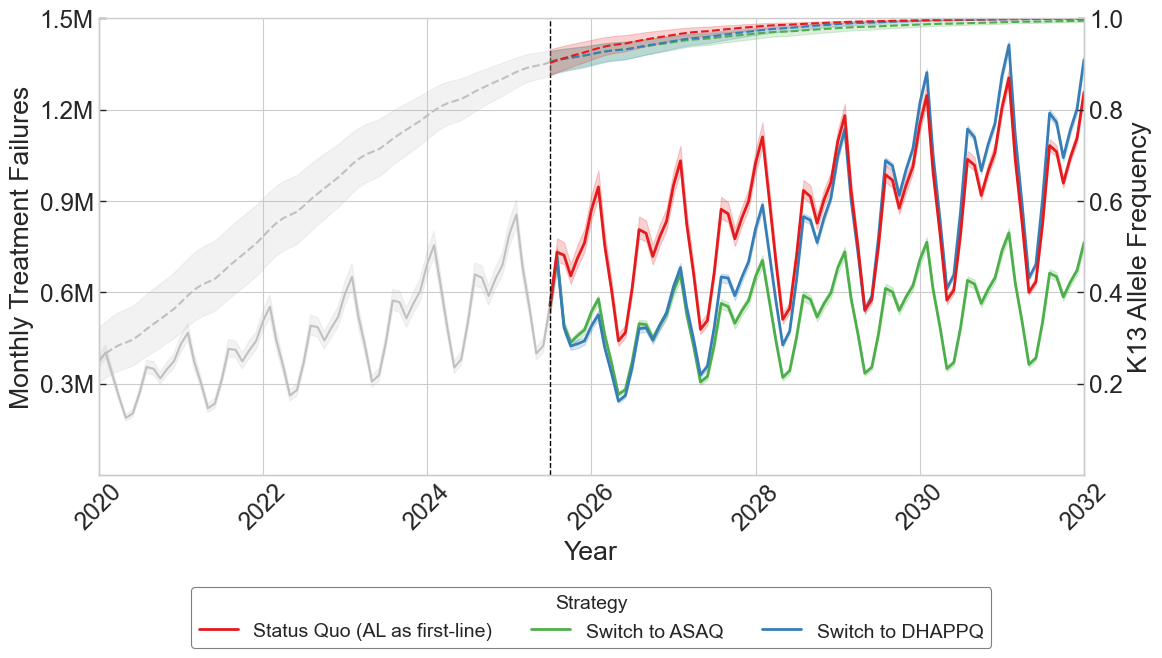

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
import pandas as pd

# Adjust the y-axis to show values in millions
def millions_formatter(x, pos):
    return f'{x * 1e-6:.1f}M'  # Formats in millions with one decimal point

# --- Load and Prepare Data ---
csv_path = "./data/fig4_data.csv"  # Adjust path as needed
df = pd.read_csv(csv_path)
df['date'] = pd.to_datetime(df['date'])

# Filter scenarios
scenarios_to_plot = ["status_quo", "asaq", "dhappq"]
filtered_data = df[df['scenario'].isin(scenarios_to_plot)]
critical_point = pd.to_datetime("2025-07-01")

# --- Plot Configuration ---
# Update color scheme based on performance ranking
colors = {
    "asaq": "#4daf4a",       # Green: Best (ASAQ)
    "dhappq": "#377eb8",     # Purple: Intermediate (DHAPPQ)
    "status_quo": "#e41a1c", # Red: Worst (Status Quo)
}

pre_policy_color = "#c0c0c0"

# Determine tick positions
left_yticks = [0.3e6, 0.6e6, 0.9e6, 1.2e6, 1.5e6]
right_yticks = [tick / 1.5e6 for tick in left_yticks]  # normalize to [0, 1]

# Recreate the plot
fig, ax1 = plt.subplots(figsize=(12, 8))
ax2 = ax1.twinx()

sns.set_context("paper", font_scale=2)
sns.set_style("whitegrid")
pre = filtered_data[(filtered_data["date"] <= critical_point)]
sns.lineplot(data=pre, x='date', y='total_treatmentfailures', ax=ax1,
                 color=pre_policy_color, lw=1.5, alpha=1, zorder=1, errorbar=("pi", 90))
sns.lineplot(data=pre, x='date', y='k13_frequency', ax=ax2,
                 color=pre_policy_color, lw=1.5, alpha=1, zorder=1, linestyle='--',errorbar=("pi", 90))
# Plot lines
for scenario in colors:

    post = filtered_data[(filtered_data["scenario"] == scenario) & (filtered_data["date"] >= critical_point)]


    sns.lineplot(data=post, x='date', y='total_treatmentfailures', ax=ax1,
                 color=colors[scenario], lw=2, zorder=2,errorbar=("pi", 90))


    sns.lineplot(data=post, x='date', y='k13_frequency', ax=ax2,
                 color=colors[scenario], lw=1.5, zorder=2, linestyle='--',errorbar=("pi", 90))

# Background & vertical policy line
x_start = mdates.date2num(filtered_data['date'].min())
x_end = mdates.date2num(critical_point)
# ax1.add_patch(Rectangle((x_start, 0), x_end - x_start, 1.5e6, transform=ax1.transData,
                        # color=pre_policy_color, alpha=0.3, zorder=0))
ax1.axvline(critical_point, color='black', linestyle='--', lw=1, zorder=3)

# Axes setup
ax1.set_ylabel("Monthly Treatment Failures")
ax1.set_ylim([0, 1.5e6])
ax1.set_yticks(left_yticks)
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(millions_formatter))

ax2.set_ylabel("K13 Allele Frequency")
ax2.set_ylim([0, 1.0])
ax2.set_yticks(right_yticks)
ax2.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f"{x:.1f}"))

# X-axis formatting
ax1.set_xlim([pd.to_datetime("2020-01-01"), pd.to_datetime("2032-01-01")])
ax1.set_xlabel("Year")
ax1.xaxis.set_major_locator(mdates.YearLocator(2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Grid & ticks
ax1.grid(True, axis='both')
ax2.grid(False)
ax1.tick_params(axis='x', rotation=45)
ax1.tick_params(axis='both', direction='in')
ax2.tick_params(axis='both', direction='in')

# Legend
legend_labels = {
    "status_quo": "Status Quo (AL as first-line)",
    "asaq": "Switch to ASAQ",
    "dhappq": "Switch to DHAPPQ"
}
custom_lines = [Line2D([0], [0], color=colors[key], lw=2) for key in legend_labels]
leg = ax1.legend(custom_lines, [legend_labels[k] for k in legend_labels],
           title="Strategy", frameon=True, fancybox=True, framealpha=1,
           facecolor='white', edgecolor='gray', fontsize=14, title_fontsize=14,
            loc='lower center', bbox_to_anchor=(0.5, -0.4),ncol=3
           )
frame = leg.get_frame()
frame.set_facecolor('white')
frame.set_alpha(1)
frame.set_edgecolor('gray')

sns.despine(ax=ax1, right=False)
plt.tight_layout(rect=[0, 0.05, 1, 1])
# plt.savefig("fig4_dual_axis.pdf", bbox_inches='tight')
plt.savefig("figure_4_combine.png", dpi=300, bbox_inches='tight')
plt.show()
